### Projet Data Mining 15/01/2024

# Business Understanding
-  La banque Américaine souhaite vendre son produit de dépôt à terme à ses clients. Avant le lancement du produit, elle souhaite développer un modèle qui l'aidera à comprendre si un client spécifique achètera ou non leur produit (en se basant sur les interactions passées du client avec la banque ).

- La banque souhaite utiliser un modèle de ML pour présélectionner les clients dont les chances d'acheter le produit sont plus élevées. 
 ### Plan du projet:
      1- Importation des libreris
      2- Data understanding
      3- Visualisation et analyse
      4- Préparation et nettoyage des données 
      5- Classification
          5.1- Regression Logestic
          5.2- Random forest
      7- Choix du modéle
      8- Reporting


In [2]:
#Biblio pour la manipulation/nettoyage de la bD
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Biblio pour la visualisation des données 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8


In [258]:
#Importer la bd 
bank=pd.read_csv("bank-additional-full.csv",sep=';')
bank=bank.copy()

In [90]:
bank.shape

(41188, 21)

### Nous avons 4118 observations et 21 variables. 


In [91]:
print (bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [92]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [93]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [94]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [95]:
#Descrbtion de la base 
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [96]:
#Affichage des modalités pour les variables 
print("Job:",bank.job.value_counts(),sep = '\n')
print("-"*10)
print("Marital:",bank.marital.value_counts(),sep = '\n')
print("-"*10)
print("Education:",bank.education.value_counts(),sep = '\n')
print("-"*10)
print("Default:",bank.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",bank.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",bank.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",bank.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",bank.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",bank.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",bank.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",bank.y.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
----------------------------------------
Personal loan:
no



### Variables relatives aux clients de la banque :

Age : âge du client (numérique)

Job : type d'emploi (catégorique)

Marital  : état civil (catégorique)

Education : niveau d'éducation du client (catégorique)

Defaut : Le client a-t-il un crédit impayé (catégorique)

Housing : Le client a-t-il contracté un crédit au logement (catégorique) ?

loan : Le client a-t-il un crédit  personnel(catégorique) ?

### Variables en rapport avec le dernier contact de la campagne en cours :

Contact : Type de communication du contact (catégorique)

Month: dernier contact mois de l'année (catégorique)

day_of_week : jour de la semaine du dernier contact (catégorique)

duration : durée du dernier contact, en secondes (numérique).


### Autres variables:

campaign: nombre de contacts effectués au cours de cette campagne et pour ce client (numérique)

pdays: nombre de jours écoulés depuis que le client a été contacté pour la dernière fois dans le cadre d'une campagne précédente (numérique ; 999 signifie que le client n'a pas été contacté auparavant))

previous: nombre de contacts effectués avant cette campagne et pour ce client (numérique)

poutcome: résultat de la campagne marketing précédente (catégorique)

### Attributs du contexte social et économique

emp.var.rate : taux de variation de l'emploi - indicateur trimestriel (numérique)

cons.price.idx : indice des prix à la consommation - indicateur mensuel (numérique)

cons.conf.idx : indice de confiance des consommateurs - indicateur mensuel (numérique)

euribor3m : taux euribor 3 mois - indicateur journalier (numérique)

nr.employed : nombre de salariés - indicateur trimestriel (numérique)


### Variable de sortie (objectif souhaité) :
y: le client a-t-il souscrit un dépôt à terme ? (binaire : "oui", "non")

# Nettoyage de données

In [98]:
print('Les valeurs manquantes',bank.isnull().sum(), sep = '\n')


Les valeurs manquantes
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [99]:
# Vérification des doublons
duplicated_rows = bank[bank.duplicated()]
df = bank.drop(duplicated_rows.index)


In [100]:
df.shape

(41176, 21)

In [101]:
duplicated_rows.shape

(12, 21)

In [102]:
print(duplicated_rows)

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

### Nous avons éliminer 12 obseravations en double

## Visualisation des données

<AxesSubplot:>

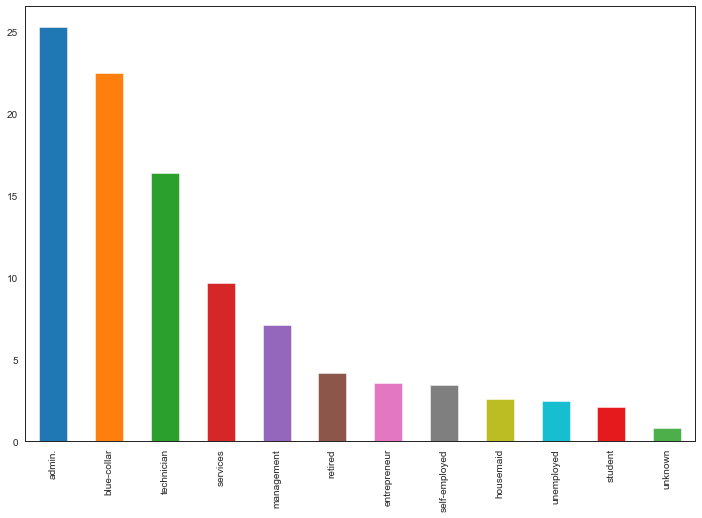

In [103]:
# La relation  entre les différents types d’emplois
round(bank['job'].value_counts()/bank.shape[0]*100,2).plot.bar(color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#e41a1c", "#4daf4a"])

- Administrateur est l'emploi avec l'occurence la plus elvées dans notre BD

In [104]:
#Age
print('age maximum: ', bank['age'].max())
print('age minimum: ', bank['age'].min())
print('age moyen: ', bank['age'].mean())
print('age null: ', bank['age'].isnull().any())

age maximum:  98
age minimum:  17
age moyen:  40.02406040594348
age null:  False


- Les données sur l'âge des clients de notre base révèlent une diversité significative, allant d'un âge minimum de 17 ans à un âge maximum de 98 ans, avec une moyenne d'âge de 40,02 ans. De plus, il est important de noter qu'aucun client n'a d'âge null dans cette base de données.

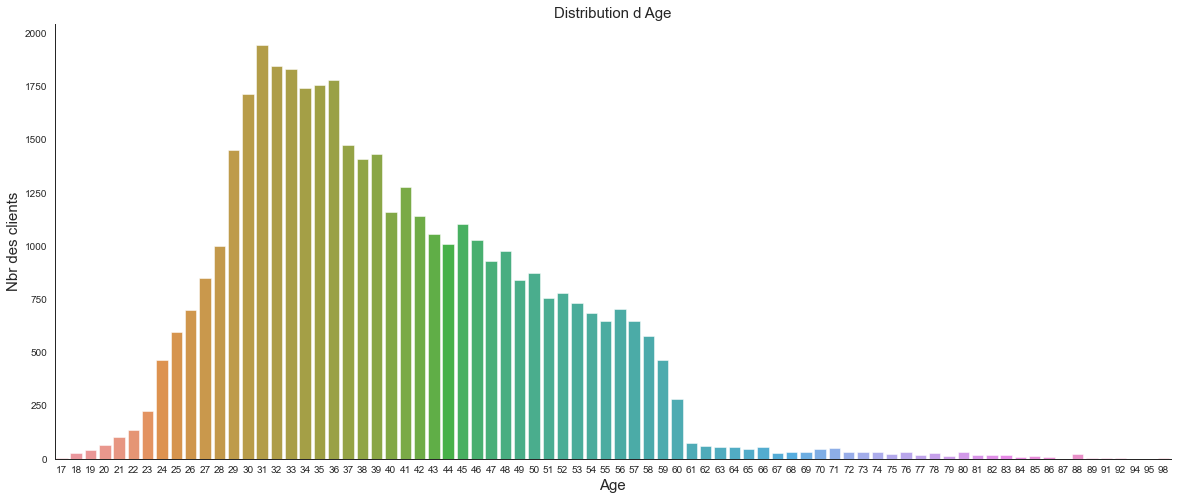

In [105]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Nbr des clients', fontsize=15)
ax.set_title('Distribution d Age', fontsize=15)
sns.despine()

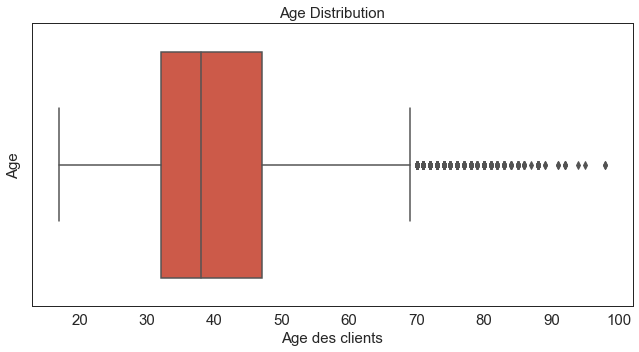

In [106]:

fig, ax1 = plt.subplots()
fig.set_size_inches(9, 5)
sns.boxplot(x = 'age', data = bank, orient = 'v', ax = ax1)
ax1.set_xlabel('Age des clients', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

La box plot représente la distribution de l'âge au sein de notre BD.
Les principaux éléments à noter sont :
  - l'àge médiane égale à 40 ans
  - la majorité des clients sont entre 32 et 49 ans.
  - Une dispersion moyenne élevée signifie que nous avons des personnes de tous âges et peut-être que toutes peuvent ou non souscrire à un dépôt à terme.donc ne pouvons pas conclure si l'âge a un effet important sur notre variable y

## Visualisation de genre d'emplois des clients 

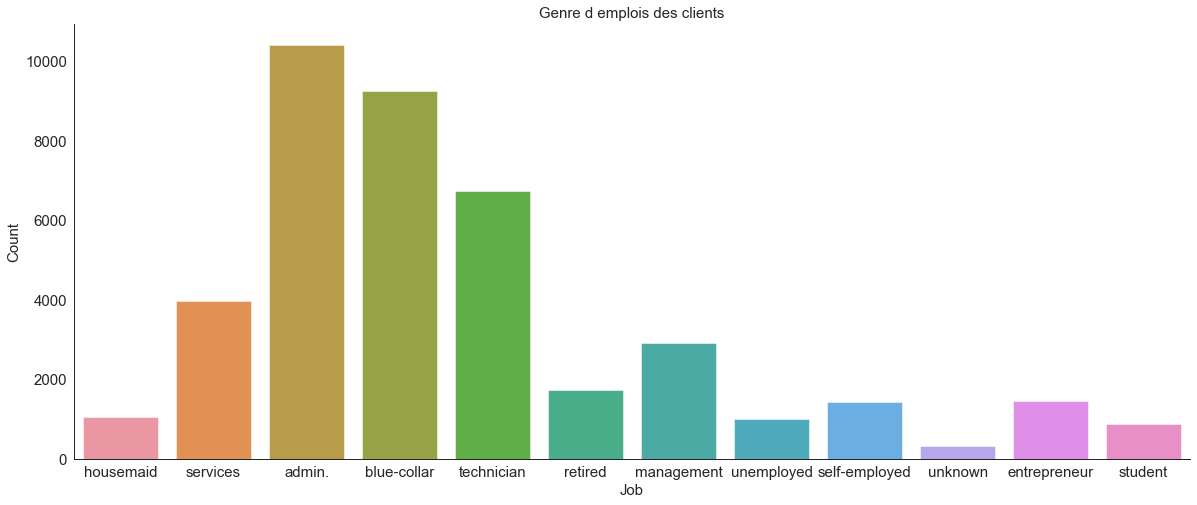

In [261]:
#Visualisation de la variable job
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Genre d emplois des clients', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()


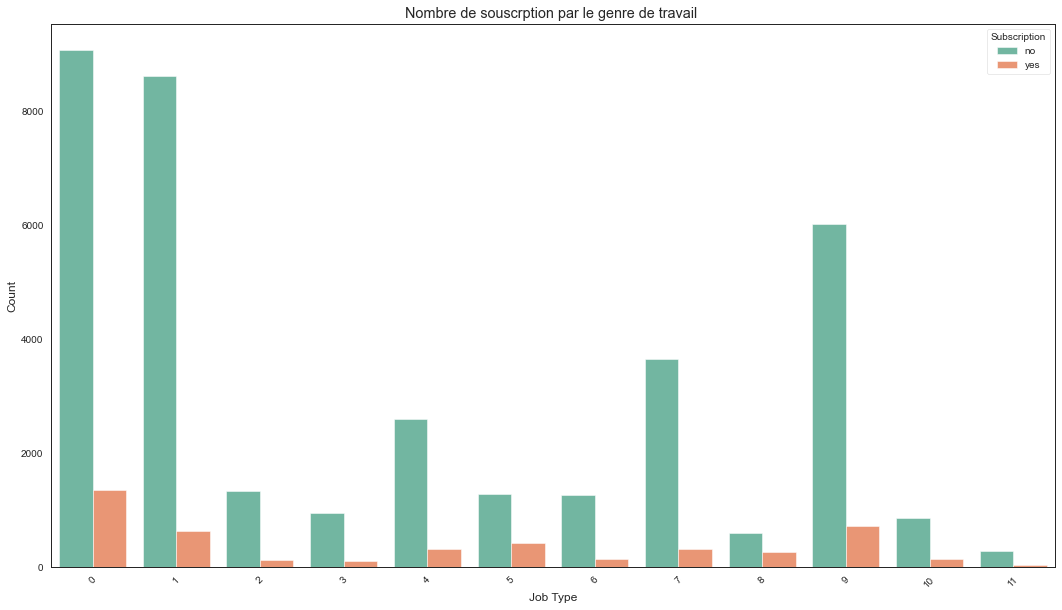

In [259]:
# L'impact de travail sur la souscrption
plt.figure(figsize=(18, 10 ))
sns.countplot(data=bank2, x='job', hue='y',palette='Set2')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Nombre de souscrption par le genre de travail ')
plt.xticks(rotation=45)
plt.legend(title='Subscription')
plt.show()


- Les administrateurs sont la catégorie qui a le plus souscrit 

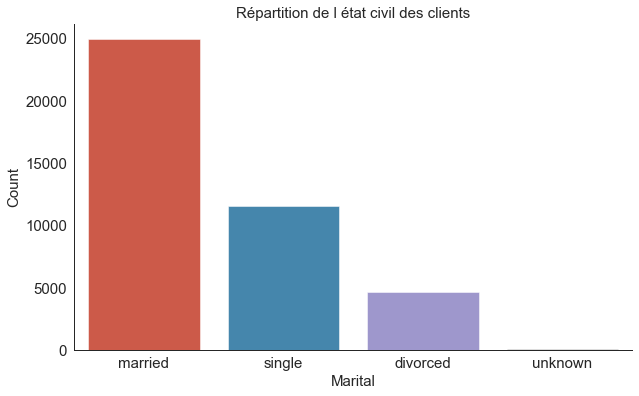

In [108]:
#Visualisation de la variable Marital
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.countplot(x = 'marital', data = bank)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Répartition de l état civil des clients', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()


- La majorité des clients de la banque sont mariés. 
- Cette information argument le fait que la plupart de nos clients, étant mariés, se situent dans la tranche d'âge de 32 à 49 ans.

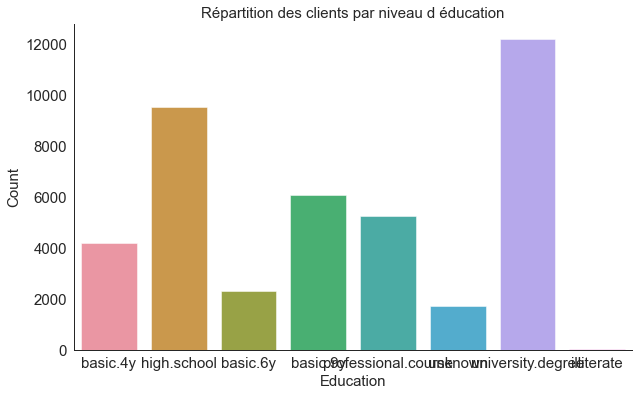

In [109]:
#Visualisation de la variable Education
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.countplot(x = 'education', data = bank)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Répartition des clients par niveau d éducation', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

- Cette information suggère que la majorité des clients de la banque ont obtenu un diplôme universitaire. Cela pourrait indiquer un niveau d'éducation élevé parmi la clientèle de la banque. Cette tendance pourrait également avoir des implications pour les produits financiers ou les services offerts.

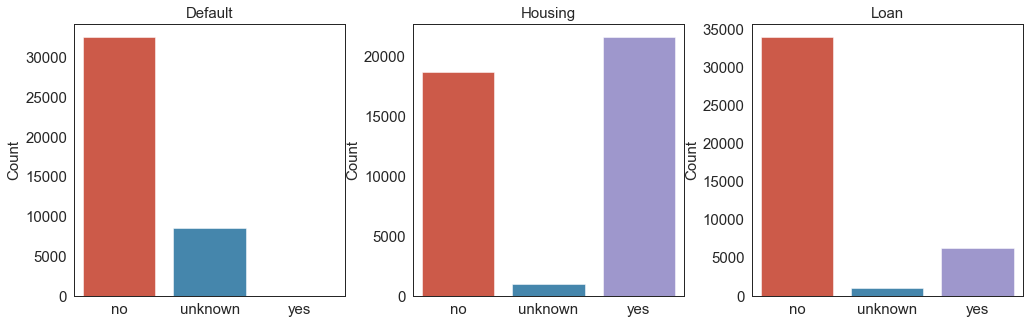

In [110]:
# Quel est le nombre de clients ayant un crédit en souffrance ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (17,5))
sns.countplot(x = 'default', data = bank, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Combien de clients ont pris un crédit pour leur logement ?
sns.countplot(x = 'housing', data = bank, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

#  Combien de clients ont pris un crédit personnel ?
sns.countplot(x = 'loan', data = bank, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [111]:
print('Default:\n Clients sans crédit impayé:'     , bank[bank['default'] == 'no']     ['age'].count(),
              '\n unknown:', bank[bank['default'] == 'unknown']['age'].count(),
              '\n Clients avec crédit impayé:' , bank[bank['default'] == 'yes']    ['age'].count())

Default:
 Clients sans crédit impayé: 32588 
 unknown: 8597 
 Clients avec crédit impayé: 3


In [112]:
print('Housing:\n Clients sans crédit immoblier:'     , bank[bank['housing'] == 'no']     ['job'].count(),
              '\n unknown:', bank[bank['housing'] == 'unknown']['age'].count(),
              '\n Clients avec crédit immoblier:' , bank[bank['housing'] == 'yes']    ['age'].count())

Housing:
 Clients sans crédit immoblier: 18622 
 unknown: 990 
 Clients avec crédit immoblier: 21576


In [113]:
print('loan:\n Clients sans crédit personnel:'     , bank[bank['loan'] == 'no']     ['age'].count(),
              '\n unknown:', bank[bank['loan'] == 'unknown']['age'].count(),
              '\n Clients avec crédit personnel:' , bank[bank['loan'] == 'yes']    ['age'].count())

loan:
 Clients sans crédit personnel: 33950 
 unknown: 990 
 Clients avec crédit personnel: 6248


####  8597 clients qui ont accorder des crédit impayé
####  Plus de la moitié des clients ont souscrit un crédit immobilier
#### 6248 client accorder des crédit personnel

## Matrice de corrélation (variable du contexte sociaux économique)

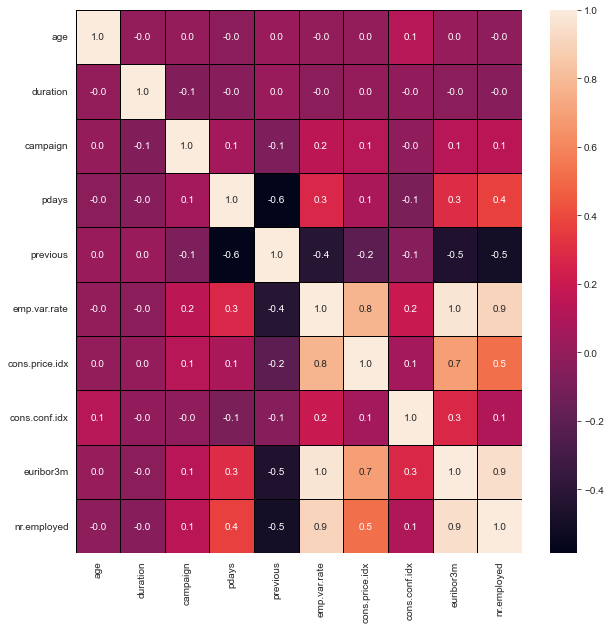

In [114]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(bank.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

emp.var.rate : taux de variation de l'emploi - indicateur trimestriel (numérique)

cons.price.idx : indice des prix à la consommation - indicateur mensuel (numérique)

cons.conf.idx : indice de confiance des consommateurs - indicateur mensuel (numérique)

euribor3m : taux euribor 3 mois - indicateur journalier (numérique)

nr.employed : nombre de salariés - indicateur trimestriel (numérique)

- les indicateurs sont fortement corrélés entre eux
- Le taux d’effectif ( nr.employed) est fortement corrélé au taux de variation des effectifs (emp.var.rate)
- L'indice des prix à la consommation (cons.price.idx) est fortement corrélé au taux d'intérêt bancaire(cons.conf.idx) (plus l'indice des prix est élevé, plus le taux d'intérêt est élevé)
- Le taux de variation des salariés (emp.var.rate) est également corrélé aux taux d’intérêt bancaires (euribor3m)

In [ ]:
# Analyse des compagne

<BarContainer object of 41188 artists>

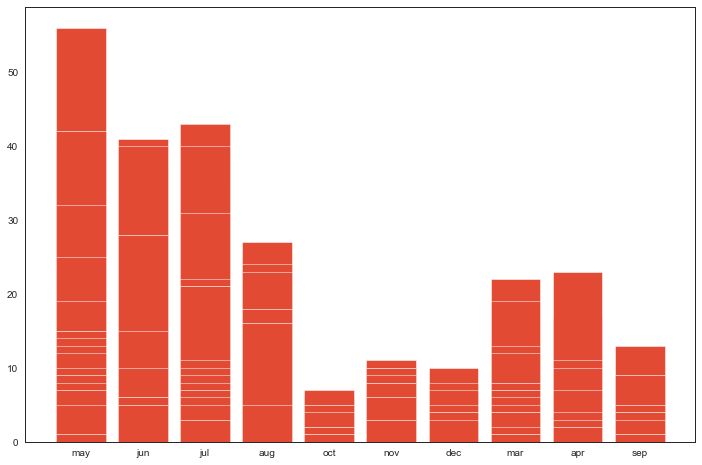

In [115]:
plt.bar(bank['month'], bank['campaign'])


- la campagne est concentrée majoritairement sur le début de la période bancaire (mai, juin et juillet)

### Combien de clients ont été contactés chaque mois à des fins de marketing ?

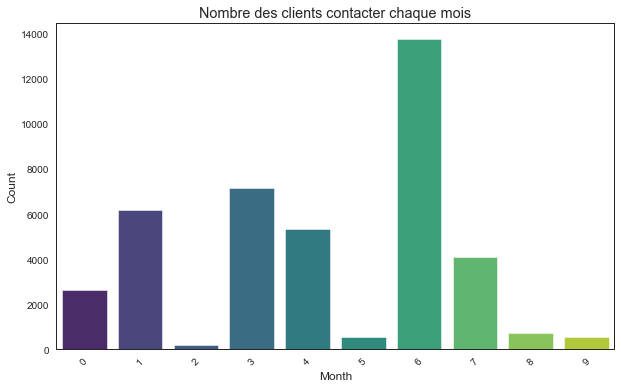

In [252]:
plt.figure(figsize=(10, 6))
sns.countplot(data=bank, x='month', palette='viridis')
plt.title('Nombre des clients contacter chaque mois')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Passons maintenamnt à la modélistation
- J'ai commencer par l'encodage des variable


In [117]:
# Codage des variable de type chaine de caractére
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank['job']      = labelencoder_X.fit_transform(bank['job']) 
bank['marital']  = labelencoder_X.fit_transform(bank['marital']) 
bank['education']= labelencoder_X.fit_transform(bank['education']) 
bank['default']  = labelencoder_X.fit_transform(bank['default']) 
bank['housing']  = labelencoder_X.fit_transform(bank['housing']) 
bank['loan']     = labelencoder_X.fit_transform(bank['loan']) 

In [ ]:
# Affichage des valeurs uniques de certaine variables

In [118]:
bank.job.unique()

array([ 3,  7,  0,  1,  9,  5,  4, 10,  6, 11,  2,  8])

In [119]:
bank.marital.unique()

array([1, 2, 0, 3])

In [120]:
bank.housing.unique()

array([0, 2, 1])

In [121]:
#Création des groupes d'age selon les valeurs reférence(Min, Max, Mean)
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank);

In [122]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [127]:
col_list2 = list(data.columns)
col_list2

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'cons.conf.idx',
 'y']

In [128]:
col_list2.remove("y")

In [129]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col_list2:
    bank[i] = labelencoder.fit_transform(bank[i])

In [130]:
bank


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,261,0,999,0,nonexistent,1.1,93.994,16,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,1,149,0,999,0,nonexistent,1.1,93.994,16,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,1,226,0,999,0,nonexistent,1.1,93.994,16,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,1,151,0,999,0,nonexistent,1.1,93.994,16,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,1,307,0,999,0,nonexistent,1.1,93.994,16,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4,5,1,5,0,2,0,0,7,0,334,0,999,0,nonexistent,-1.1,94.767,0,1.028,4963.6,yes
41184,2,1,1,5,0,0,0,0,7,0,383,0,999,0,nonexistent,-1.1,94.767,0,1.028,4963.6,no
41185,3,5,1,6,0,2,0,0,7,0,189,1,999,0,nonexistent,-1.1,94.767,0,1.028,4963.6,no
41186,2,9,1,5,0,0,0,0,7,0,442,0,999,0,nonexistent,-1.1,94.767,0,1.028,4963.6,yes


# Model 1 : regression logestique

In [131]:
bank2=bank.copy()

In [132]:
bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- J'ai évaluer l'acteur d'inflation de la variance (VIF) pour chaque variable pour le  modèle de régression linéaire multiple.
- Le VIF mesure l'ampleur de la multi-collinéarité entre les variables explicatives
- Un VIF élevé suggère une forte multi-collinéarité, ce qui peut affecter la fiabilité des estimations de régression. Cette fonction est utilisée pour diagnostiquer la présence de multi-collinéarité dans un modèle de régression et pour identifier les variables qui pourraient nécessiter une attention particulière dans l'analyse.

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in bank.columns:
    if (( bank[col].dtype != "object") & (col != "y")):
        col_list.append(col)
    
X = bank[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range (len(X.columns))]
vif_data

,feature,VIF
0,age,10.046428
1,job,2.120286
2,marital,5.583548
3,education,4.456595
4,default,1.400841
5,housing,2.205441
6,loan,1.207766
7,contact,2.846268
8,month,6.747481
9,day_of_week,3.085740


In [134]:
#data = bank.drop(["age","pdays", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed"], axis = 1)

In [219]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,261,0,999,0,nonexistent,1.1,93.994,16,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,1,149,0,999,0,nonexistent,1.1,93.994,16,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,1,226,0,999,0,nonexistent,1.1,93.994,16,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,1,151,0,999,0,nonexistent,1.1,93.994,16,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,1,307,0,999,0,nonexistent,1.1,93.994,16,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4,5,1,5,0,2,0,0,7,0,334,0,999,0,nonexistent,-1.1,94.767,0,1.028,4963.6,yes
41184,2,1,1,5,0,0,0,0,7,0,383,0,999,0,nonexistent,-1.1,94.767,0,1.028,4963.6,no
41185,3,5,1,6,0,2,0,0,7,0,189,1,999,0,nonexistent,-1.1,94.767,0,1.028,4963.6,no
41186,2,9,1,5,0,0,0,0,7,0,442,0,999,0,nonexistent,-1.1,94.767,0,1.028,4963.6,yes


In [223]:
df_dep = bank["y"]
df_dep

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [224]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_ind, df_dep, train_size= 0.75, random_state=0)

In [225]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
10685,3,1,0,3,0,0,0,1,4,3,676,1,999,0,1.4,94.465,8,4.961,5228.1
224,2,9,1,2,0,0,0,1,6,1,168,0,999,0,1.1,93.994,16,4.857,5191.0
29638,1,6,2,6,0,2,0,0,0,1,187,0,999,0,-1.8,93.075,3,1.405,5099.1
4804,3,9,1,3,1,0,0,1,6,4,68,0,999,0,1.1,93.994,16,4.858,5191.0
11614,2,1,2,1,0,0,0,1,4,0,81,1,999,0,1.4,94.465,8,4.959,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,3,0,0,6,0,0,0,0,1,4,559,1,999,0,1.4,93.444,17,4.965,5228.1
32103,3,4,0,6,0,0,0,0,6,0,166,0,999,0,-1.8,92.893,4,1.313,5099.1
30403,1,0,2,5,0,0,0,0,0,2,427,2,999,0,-1.8,93.075,3,1.365,5099.1
21243,2,3,2,5,0,2,2,0,1,1,111,0,999,0,1.4,93.444,17,4.963,5228.1


In [226]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()


## ENTRAINEMENT DU MODELE : 
- Notre Base de données correspondent aux campagnes de marketing direct (appels téléphoniques) réalisées par ABC banque. L'objectif de la classification est de prédire si les clients vont souscrire à un dépôt à terme (variable y).
- j'ai divisé la base en 75% données de test et 25% données d'entrainement
## Pourquoi, le choix de la regression logistique pour la classification : 
la régression logistique est couramment utilisée pour des problèmes de classification binaire, tels que la prédiction de la souscription ou non à un produit financier, comme un dépôt à terme dans notre cas. elle est adaptée pour modéliser la probabilité de résultats binaires en fonction des variables indépendantes. 

In [227]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
10685,3,1,0,3,0,0,0,1,4,3,676,1,999,0,1.4,94.465,8,4.961,5228.1
224,2,9,1,2,0,0,0,1,6,1,168,0,999,0,1.1,93.994,16,4.857,5191.0
29638,1,6,2,6,0,2,0,0,0,1,187,0,999,0,-1.8,93.075,3,1.405,5099.1
4804,3,9,1,3,1,0,0,1,6,4,68,0,999,0,1.1,93.994,16,4.858,5191.0
11614,2,1,2,1,0,0,0,1,4,0,81,1,999,0,1.4,94.465,8,4.959,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,3,0,0,6,0,0,0,0,1,4,559,1,999,0,1.4,93.444,17,4.965,5228.1
32103,3,4,0,6,0,0,0,0,6,0,166,0,999,0,-1.8,92.893,4,1.313,5099.1
30403,1,0,2,5,0,0,0,0,0,2,427,2,999,0,-1.8,93.075,3,1.365,5099.1
21243,2,3,2,5,0,2,2,0,1,1,111,0,999,0,1.4,93.444,17,4.963,5228.1


In [228]:
LR.fit(x_train, y_train)

LogisticRegression()

In [229]:
x_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
15500,2,1,1,2,0,2,0,0,3,0,635,2,999,0,1.4,93.918,6,4.957,5228.1
29034,3,1,1,0,0,2,0,0,0,0,248,1,999,0,-1.8,93.075,3,1.405,5099.1
11199,2,1,1,2,1,0,0,1,4,2,207,0,999,0,1.4,94.465,8,4.961,5228.1
22247,3,6,1,2,0,2,0,0,1,2,176,6,999,0,1.4,93.444,17,4.963,5228.1
27180,3,1,1,2,0,2,0,0,7,0,271,0,999,0,-0.1,93.200,7,4.021,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,1,9,1,5,0,0,2,0,6,4,167,0,999,0,-1.8,92.893,4,1.281,5099.1
8263,2,0,2,3,0,0,2,1,4,3,25,0,999,0,1.4,94.465,8,4.864,5228.1
24069,1,4,1,6,0,2,2,1,7,3,15,0,999,0,-0.1,93.200,7,4.700,5195.8
15531,2,9,1,5,0,2,0,0,3,0,252,5,999,0,1.4,93.918,6,4.957,5228.1


In [230]:
test_pred = LR.predict(x_test)

In [231]:
x = np.unique(test_pred)
x

array(['no', 'yes'], dtype=object)

In [233]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,261,0,999,0,nonexistent,1.1,93.994,16,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,1,149,0,999,0,nonexistent,1.1,93.994,16,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,1,226,0,999,0,nonexistent,1.1,93.994,16,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,1,151,0,999,0,nonexistent,1.1,93.994,16,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,1,307,0,999,0,nonexistent,1.1,93.994,16,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4,5,1,5,0,2,0,0,7,0,334,0,999,0,nonexistent,-1.1,94.767,0,1.028,4963.6,yes
41184,2,1,1,5,0,0,0,0,7,0,383,0,999,0,nonexistent,-1.1,94.767,0,1.028,4963.6,no
41185,3,5,1,6,0,2,0,0,7,0,189,1,999,0,nonexistent,-1.1,94.767,0,1.028,4963.6,no
41186,2,9,1,5,0,0,0,0,7,0,442,0,999,0,nonexistent,-1.1,94.767,0,1.028,4963.6,yes


In [234]:
from sklearn.metrics import *

In [235]:
c1 = confusion_matrix(y_test, test_pred)
c1

array([[8886,  253],
       [ 664,  494]], dtype=int64)

In [236]:
accuracy_score(y_test, test_pred)

0.910944935418083

In [237]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      9139
         yes       0.66      0.43      0.52      1158

    accuracy                           0.91     10297
   macro avg       0.80      0.70      0.73     10297
weighted avg       0.90      0.91      0.90     10297



- Pour la classe "no", la précision est de 93 %, ce qui signifie que sur l'ensemble des prédictions étiquetées comme "no", 93 % étaient correctes. Pour la classe "yes", la précision est de 66 %, ce qui indique que sur l'ensemble des prédictions étiquetées comme "yes", 66 % étaient correctes.

- Pour la classe "no", le rappel est de 97 %, ce qui suggère que sur l'ensemble des échantillons réels étiquetés comme "no", 97 % ont été correctement prédits. Pour la classe "yes", le rappel est de 43 %, ce qui signifie que seulement 43 % des échantillons réels étiquetés comme "yes" ont été correctement prédits.

 - Pour la classe "no", le score F1 est de 0,95, indiquant un bon équilibre entre la précision et le rappel. Pour la classe "yes", le score F1 est de 0,52, ce qui suggère un écart plus important entre la précision et le rappel.
 
 ### Conclusion: le modèle à des très bonnes performances pour la classe "no" avec des valeurs élevées de précision, de rappel et de score F1. Cependant, pour la classe "yes", bien que la précision soit acceptable, le rappel est relativement faible, ce qui signifie que le modèle a du mal à prédire avec précision les échantillons réels de cette classe.

## Modéle 2 : Random Forest

In [244]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [248]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(x_train, y_train)
rfcpred = rfc.predict(x_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, x_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[8836  303]
 [ 550  608]]
92.0


In [247]:
print(classification_report(y_test, rfcpred))

              precision    recall  f1-score   support

          no       0.94      0.97      0.95      9139
         yes       0.67      0.51      0.58      1158

    accuracy                           0.92     10297
   macro avg       0.80      0.74      0.77     10297
weighted avg       0.91      0.92      0.91     10297



- Pour la classe "no", la précision est de 94 %. Cela signifie que sur toutes les prédictions étiquetées comme "no", 94 % étaient correctes. Pour la classe "yes", la précision est de 67 %, indiquant que 67 % des prédictions étiquetées comme "yes" étaient correctes.
- Pour la classe "no", le rappel est de 97 %. Cela signifie que 97 % des échantillons réels étiquetés comme "no" ont été correctement prédits. Pour la classe "yes", le rappel est de 51 %, indiquant que 51 % seulement des échantillons réels étiquetés comme "yes" ont été correctement prédits.
- Le score F1 est de 0,95 pour la classe "no", suggérant un équilibre entre la précision et le rappel. Pour la classe "yes", le score F1 est de 0,58, indiquant une performance moyenne pour cette classe.
### Conclusion (Modéle 2):  le Modèle 2 semble avoir de bonnes performances générales, avec des précisions élevées pour la classe "no" et des scores F1 globalement satisfaisants. Cependant, pour la classe "yes", bien que la précision soit acceptable, le rappel reste relativement faible, ce qui indique que le modèle a encore du mal à prédire avec précision les échantillons réels de cette classe.

# Choix de la méthode de classification la plus précise :

#### Modèle 1 Regression logestique) :

- Précision (no/yes) : 93% / 66%
- Rappel (no/yes) : 97% / 43%
- F1-score (no/yes) : 0,95 / 0,52
- Exactitude (Accuracy) : 91%

#### Modèle 2 ( Random Forest) :

- Précision (no/yes) : 94% / 67%
- Rappel (no/yes) : 97% / 51%
- F1-score (no/yes) : 0,95 / 0,58
- Exactitude (Accuracy) : 92%

### Vu que la banque accorde plus d'importance à l'exactitude de la prédiction pour les clients qui souscrivent réellement au produit, le modèle basé sur Random Forest (Modèle 2) pourrait être préférable. Bien que le rappel pour la classe "yes" soit plus élevé dans le Modèle 2, indiquant une meilleure capacité à détecter les vrais positifs (clients qui souscrivent), la précision est également supérieure pour cette classe par rapport au Modèle 1. 